<a href="https://colab.research.google.com/github/Ashu7777/Keras_modeltraining/blob/main/Eurosat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
!unzip 2750.zip

Streaming output truncated to the last 5000 lines.
  inflating: 2750/River/River_145.jpg  
  inflating: 2750/River/River_1450.jpg  
  inflating: 2750/River/River_1451.jpg  
  inflating: 2750/River/River_1452.jpg  
  inflating: 2750/River/River_1453.jpg  
  inflating: 2750/River/River_1454.jpg  
  inflating: 2750/River/River_1455.jpg  
  inflating: 2750/River/River_1456.jpg  
  inflating: 2750/River/River_1457.jpg  
  inflating: 2750/River/River_1458.jpg  
  inflating: 2750/River/River_1459.jpg  
  inflating: 2750/River/River_146.jpg  
  inflating: 2750/River/River_1460.jpg  
  inflating: 2750/River/River_1461.jpg  
  inflating: 2750/River/River_1462.jpg  
  inflating: 2750/River/River_1463.jpg  
  inflating: 2750/River/River_1464.jpg  
  inflating: 2750/River/River_1465.jpg  
  inflating: 2750/River/River_1466.jpg  
  inflating: 2750/River/River_1467.jpg  
  inflating: 2750/River/River_1468.jpg  
  inflating: 2750/River/River_1469.jpg  
  inflating: 2750/River/River_147.jpg  
  inflati

In [ ]:
!head 2750.zip

PK     h�2M               2750/AnnualCrop/PK    �2M˜hL
  �
�>�V��������):	�d �m	�9AN��.	�'�#8ƀ @���� zZ"�qA`'�%���H%��2��?���������� �tG�z����i�,(�o'D���u,`H87&F�_<�H�XN�&'���P�{�<@&1��;�ѩ�}��}M�oG�x#MM3jZ��[Ѿ�в��~�Y>zl���n�U$��v(?�sIN��L��q�;l�ə���_eVt�^U2�w�"�!�.�$B�6�։s�;Ώ��1�H�����~�;�S�G�|�b4�t.}�K����0)F��q;L����^!�r�#>��P(��e�����d��J1	���;ڈ:��}�?�T�%���e0�]���W��y0�S��m=cQ4C����1�{k�i�-�ց�R���������zk��Y���	����4�K9�\�&>H�5R*��:���
&�8��խT���-v#Z�}�"
"��~_��/��Dz1�~GD�����@BO
��m�z
��'R+O
���\P�_Qڢ�%��o����+4�05��W�:�׸���n� �E|�:�[
�EA5S�B
�k��S>k?�\S�z~t�;_�:�q(#\�5v|o���ҧ�PK    ��2MY����


In [ ]:
import pandas

In [ ]:
import numpy import scipy.special import matplotlib.pyplot

%matplotlib inline

SyntaxError: ignored

In [ ]:

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()

pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._setup_parser_source()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader.__cinit__()
pandas/_libs/parsers.pyx in pandas._libs.parsers.TextReader._setup_parser_source()
DATASET=pd.read_csv('2750.zip')

NameError: ignored

In [ ]:
DATASET = "/content/2750"
LABELS = os.listdir(DATASET)
print(LABELS)

['Forest', 'AnnualCrop', 'SeaLake', 'Highway', 'River', 'Industrial', 'Pasture', 'PermanentCrop', 'HerbaceousVegetation', 'Residential']


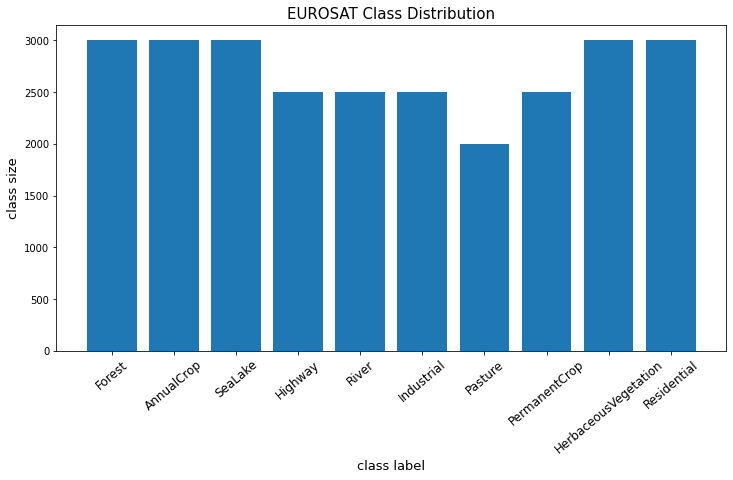

In [ ]:
# plot class distributions of whole dataset
counts = {}

for l in LABELS:
    counts[l] = len(os.listdir(os.path.join(DATASET, l)))

    
plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15);

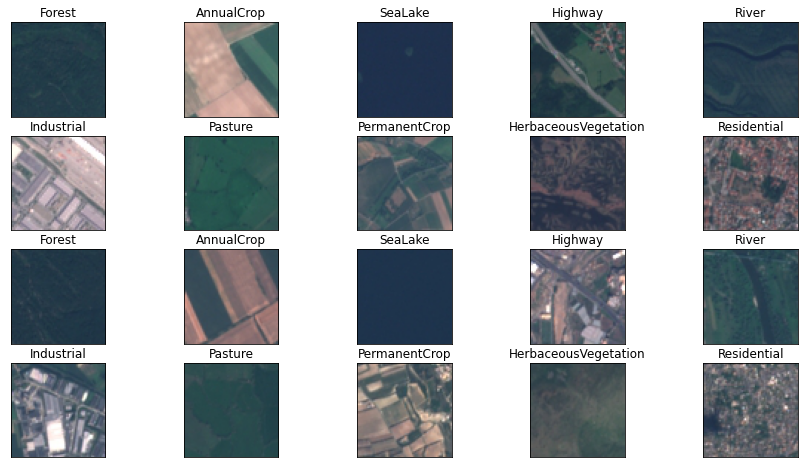

In [ ]:
img_paths = [os.path.join(DATASET, l, l+'_1000.jpg') for l in LABELS]

img_paths = img_paths + [os.path.join(DATASET, l, l+'_2000.jpg') for l in LABELS]

def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-2])

plot_sat_imgs(img_paths)

In [ ]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '../content/training'
TEST_DIR = '../content/testing'
BATCH_SIZE = 64
NUM_CLASSES=len(LABELS)
INPUT_SHAPE = (64, 64, 3)
CLASS_MODE = 'categorical'

# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test
for l in LABELS:
    
    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [ ]:
# map each image path to their class label in 'data'
data = {}

for l in LABELS:
    for img in os.listdir(DATASET+'/'+l):
        data.update({os.path.join(DATASET, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('\.\.\/content\/2750', '../content/training', i) for i in train_paths]
    new_test_paths = [re.sub('\.\.\/content\/2750', '../content/testing', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

100%|██████████| 5400/5400 [00:00<00:00, 184825.38it/s]

moving training files..
moving testing files..


In [ ]:
# Create a ImageDataGenerator Instance which can be used for data augmentation

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)


train_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)

# The validation set is optional if we choose to do that
"""
valid_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    subset='validation',    
    color_mode='rgb',
    shuffle=True,
    seed=69
)
"""
# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 0 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [ ]:
np.save('class_indices', train_generator.class_indices)

In [ ]:
 #Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=21600, 
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)
rf_test_generator = rf_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=CLASS_MODE,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 0 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
train = rf_train_generator.next()
X_train = train[0].reshape(21600, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]


ValueError: ignored

In [ ]:
# Creating mini batches of training data as training on whole data is difficult
ids_1 = np.random.choice(len(X_train), size=21600, replace=False)
X_train_mini_1 = X_train[ids_1]
y_train_mini_1 = rf_train_generator.classes[ids_1]

NameError: ignored